In [27]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [28]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [29]:
dummies = pd.get_dummies(df[['gender', 'smoking_history']], dtype='int')
df = df.join(dummies)
df = df.drop(['gender', 'smoking_history'], axis=1)
df = df.replace({'Female': 0, 'Male': 1})
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  int32  
 8   gender_Male                  100000 non-null  int32  
 9   gender_Other                 100000 non-null  int32  
 10  smoking_history_No Info      100000 non-null  int32  
 11  smoking_history_current      100000 non-null  int32  
 12  smoking_history_ever         100000 non-null  int32  
 13  

In [30]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Determinng best parameters for Logistic Regression
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

# Define the hyperparameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logistic__solver': ['liblinear', 'saga'],  # Solver to use
    'logistic__penalty': ['l1', 'l2']  # Type of regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'logistic__C': 0.01, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best cross-validation score: 0.9608625
Test set score: 0.9591


In [7]:
#Determinng best parameters for Decision Tree Classifier
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_samples_split': [2, 3, 4, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 550 candidates, totalling 2750 fits
Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.9718
Test set score: 0.97215


In [8]:
#Determinng best parameters for Random Tree Classifier
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('rf', RandomForestClassifier())
])

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric for optimization
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best Cross-Validation Score: 0.971875
Test set score: 0.9724


In [5]:
#Determinng best parameters for SVM
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel types
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
}

grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric for optimization
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Cross-Validation Score: 0.9643999999999998
Test set score: 0.96335


In [11]:
#Determinng best parameters for KNN
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': list(range(1, 20, 2)),
          'knn__weights': ['uniform', 'distance'],
          'knn__leaf_size': [5, 10, 15],
          'knn__p': [1, 2],
}

grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric for optimization
                           n_jobs=-1,  # Use all available cores
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'knn__leaf_size': 10, 'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Cross-Validation Score: 0.9611500000000002
Test set score: 0.96045


In [35]:
model_list = ['Logistic Regression', 'Decision Tree', 'Random Tree', 'SVM', 'KNN']
train_score = []
test_score = []
fit_time = []
prec_score = []
rec_score = []

In [36]:
#Creating/Testing Logistic Regressgion Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                 ('lgr', LogisticRegression(max_iter=1000, 
                                            C = 0.01, penalty = 'l1', solver = 'liblinear'))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Logistic Regression Train Score:", pipeline.score(X_train, y_train))
print("Logistic Regression Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score: 0.8823024054982818
Recall Score: 0.6012880562060889
Accuracy Score: 0.9591
Logistic Regression Train Score: 0.9608125
Logistic Regression Test Score: 0.9591
Fit Time: 0.4795961380004883


In [22]:
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Precision Score:  0.8823024054982818
Recall Score:  0.6012880562060889
Accuracy Score:  0.9591


In [37]:
#Creating/Testing DecisionTreeClassifier Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 2, 
                                    min_samples_split = 2, min_samples_leaf = 1))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Decision Tree Train Score:", pipeline.score(X_train, y_train))
print("Decision Tree Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  1.0
Recall Score:  0.6738875878220141
Accuracy Score:  0.97215
Decision Tree Train Score: 0.9718
Decision Tree Test Score: 0.97215
Fit Time: 0.06598806381225586


In [38]:
#Creating/Testing RandomForestClassifier Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                       ('rfc', RandomForestClassifier(bootstrap = True, max_depth=None, 
                                                   min_samples_leaf=4, min_samples_split = 10, n_estimators=200))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Decision Tree Train Score:", pipeline.score(X_train, y_train))
print("Decision Tree Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  0.9965606190885641
Recall Score:  0.6785714285714286
Accuracy Score:  0.97235
Decision Tree Train Score: 0.9738375
Decision Tree Test Score: 0.97235
Fit Time: 8.388327836990356


In [39]:
#Creating/Testing SVM Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                     ('svm', SVC(C = 10, kernel='rbf', gamma = 0.1))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("SVC Train Score:", pipeline.score(X_train, y_train))
print("SVC Test Score:",pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  0.9737609329446064
Recall Score:  0.5866510538641686
Accuracy Score:  0.96335
SVC Train Score: 0.967
SVC Test Score: 0.96335
Fit Time: 69.14727759361267


In [40]:
#Creating/Testing KNN Model
start_time = time.time()
knn_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=9, leaf_size = 10, 
                                                     p = 2, weights = 'uniform'))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = knn_pipe.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("KNN Train Score:", knn_pipe.score(X_train, y_train))
print("KNN Test Score:",knn_pipe.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(knn_pipe.score(X_train, y_train))
test_score.append(knn_pipe.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  0.9362511893434824
Recall Score:  0.5761124121779859
Accuracy Score:  0.96045
KNN Train Score: 0.9655875
KNN Test Score: 0.96045
Fit Time: 0.3057706356048584


In [41]:
res_dict = {'Model': model_list,
           'Train Time': fit_time,
           'Train Accuracy': train_score,
           'Test Accuracy': test_score,
           'Precision Score': prec_score,
           'Recall Score': rec_score,}
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score
Model,,,,,
Logistic Regression,0.479596,0.960812,0.960812,0.882302,0.601288
Decision Tree,0.065988,0.971800,0.971800,1.000000,0.673888
Random Tree,8.388328,0.973838,0.973838,0.996561,0.678571
SVM,69.147278,0.967000,0.967000,0.973761,0.586651
KNN,0.305771,0.965588,0.965588,0.936251,0.576112


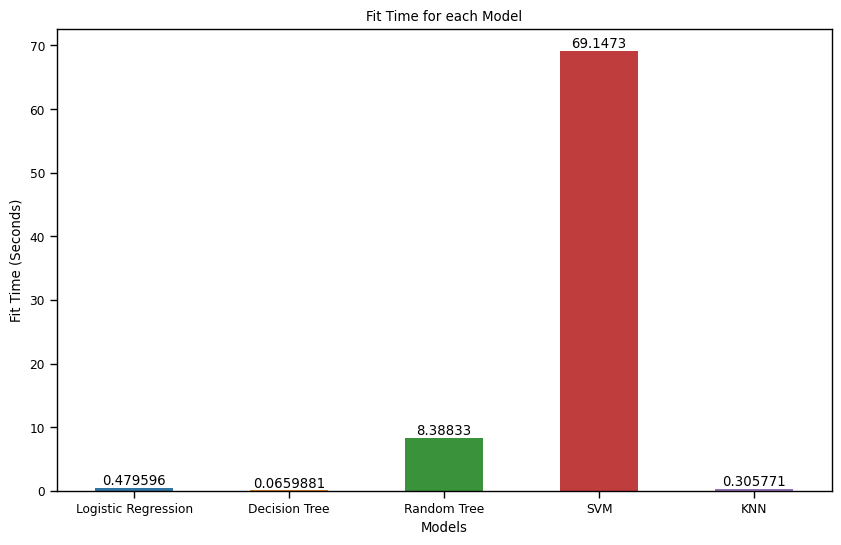

In [62]:
#Display Training Time
data = pd.DataFrame({
    'fit_time': fit_time,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='fit_time', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Fit Time (Seconds)")
plt.title("Fit Time for each Model")

# Display the plot
plt.show()

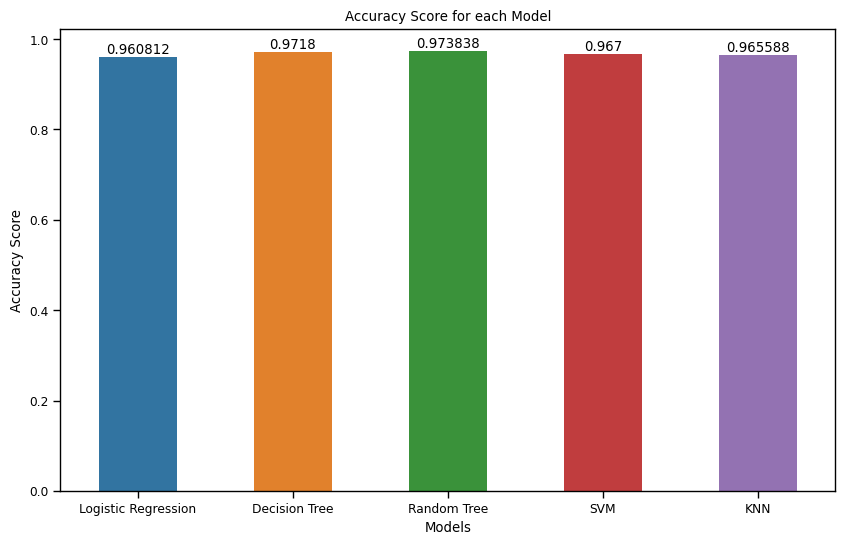

In [64]:
#Display Accuracy(Test) Score
data = pd.DataFrame({
    'test_score': test_score,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='test_score', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for each Model")

# Display the plot
plt.show()

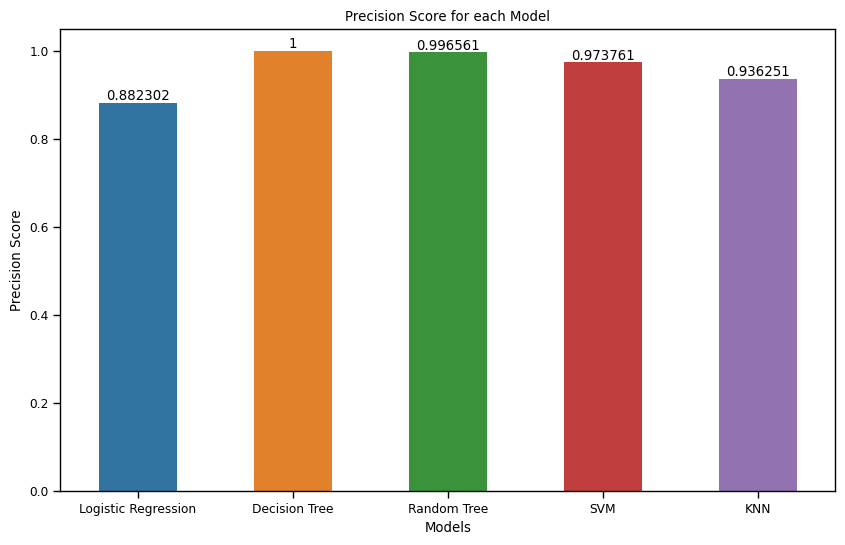

In [65]:
#Display Precision Score
data = pd.DataFrame({
    'precision_score': prec_score,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='precision_score', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Precision Score for each Model")

# Display the plot
plt.show()

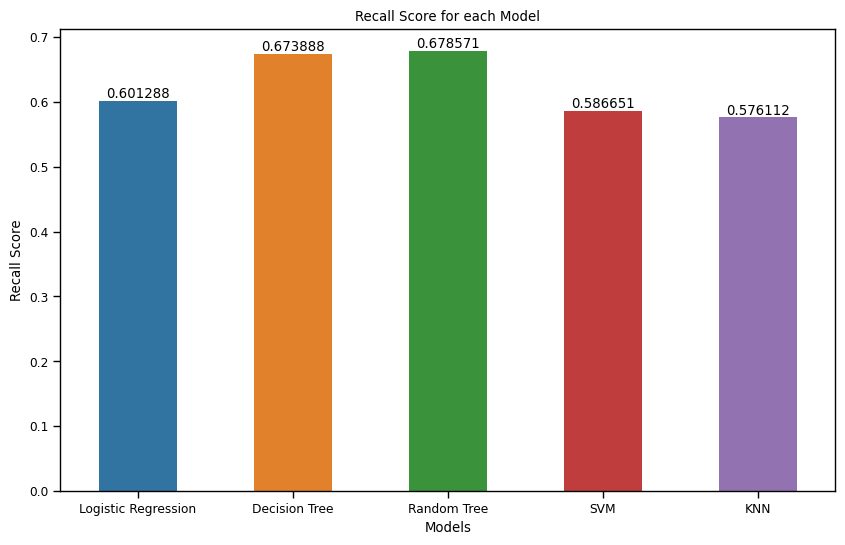

In [66]:
#Display Precision Score
data = pd.DataFrame({
    'recall_score': rec_score,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='recall_score', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Recall Score for each Model")

# Display the plot
plt.show()

In [ ]:
#Determine whether to use precision, recall, or accuracy to score/fine tune the models
#Most likely to use precision 